In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/togo-dapaong_qc.csv',parse_dates=['Timestamp'])

Summary Statistics

In [3]:
# Summary Statistics
summary_stats = df.describe()

# Median Calculation (not included in `describe`)
median_values = df.median()

print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)


Summary Statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%

Data Quality Check

In [5]:
# Missing values
missing_values = df.isnull().sum()

# Negative values in irradiance columns
negative_values = {
    "GHI": (df["GHI"] < 0).sum(),
    "DNI": (df["DNI"] < 0).sum(),
    "DHI": (df["DHI"] < 0).sum(),
}

print("Missing Values:\n", missing_values)
print("\nNegative Value Counts:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Value Counts:
 {'GHI': np.int64(257385), 'DNI': np.int64(0), 'DHI': np.int64(0)}


Time Series Analysis

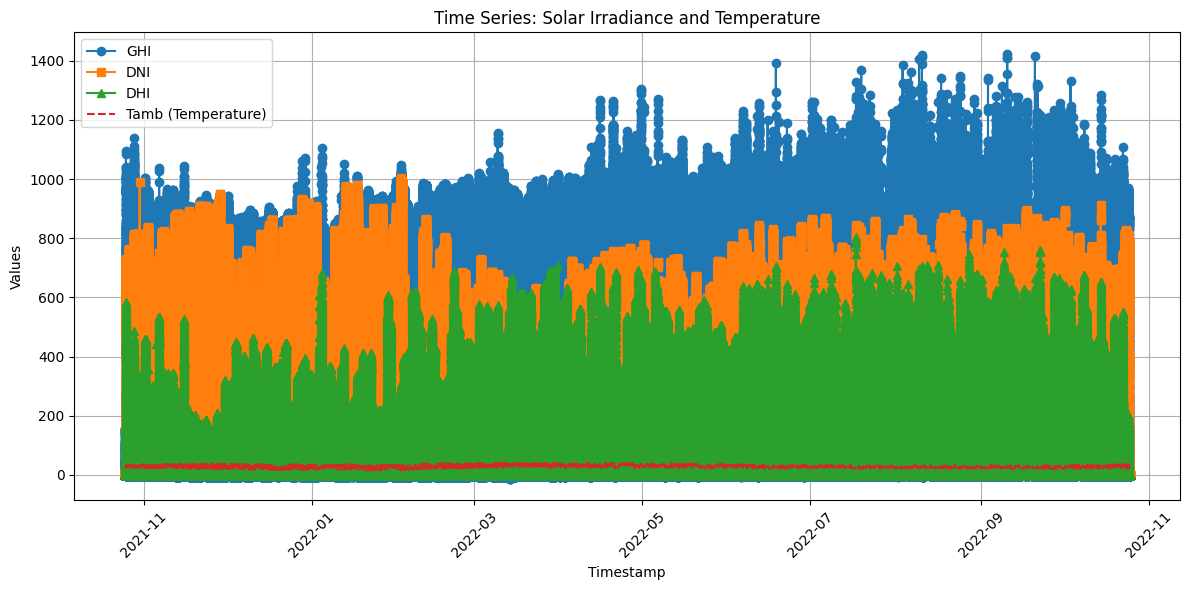

In [6]:
import matplotlib.pyplot as plt

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["GHI"], label="GHI", marker="o")
plt.plot(df["Timestamp"], df["DNI"], label="DNI", marker="s")
plt.plot(df["Timestamp"], df["DHI"], label="DHI", marker="^")
plt.plot(df["Timestamp"], df["Tamb"], label="Tamb (Temperature)", linestyle="--")
plt.title("Time Series: Solar Irradiance and Temperature")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Impact of Cleaning

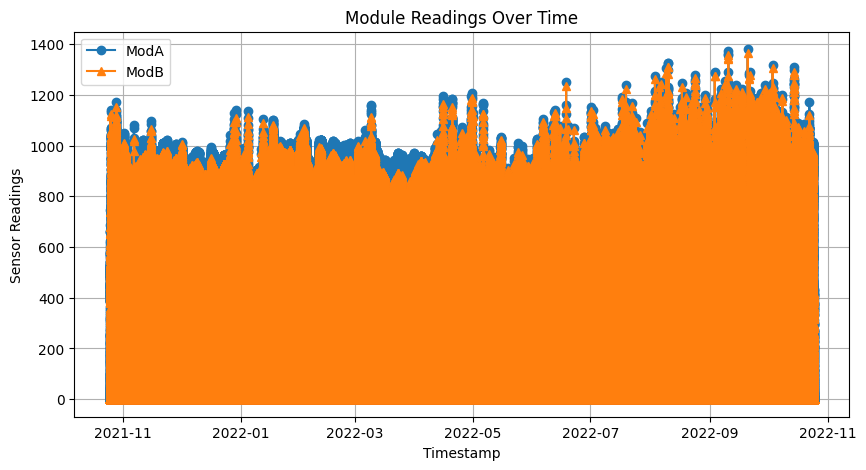

In [7]:
# Comparing ModA and ModB with Cleaning events
df_cleaning = df[df["Cleaning"] > 0]

# Plot ModA and ModB against time
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp"], df["ModA"], label="ModA", marker="o")
plt.plot(df["Timestamp"], df["ModB"], label="ModB", marker="^")
plt.title("Module Readings Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Readings")
plt.legend()
plt.grid()
plt.show()

Correlation Analysis

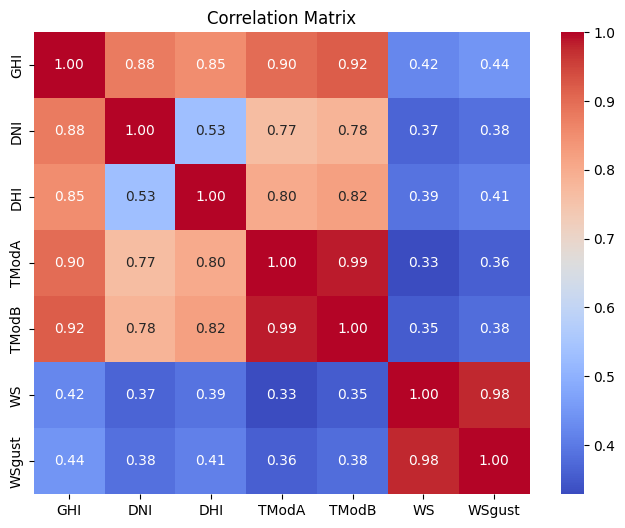

In [8]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[["GHI", "DNI", "DHI", "TModA", "TModB", "WS", "WSgust"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Wind Analysis

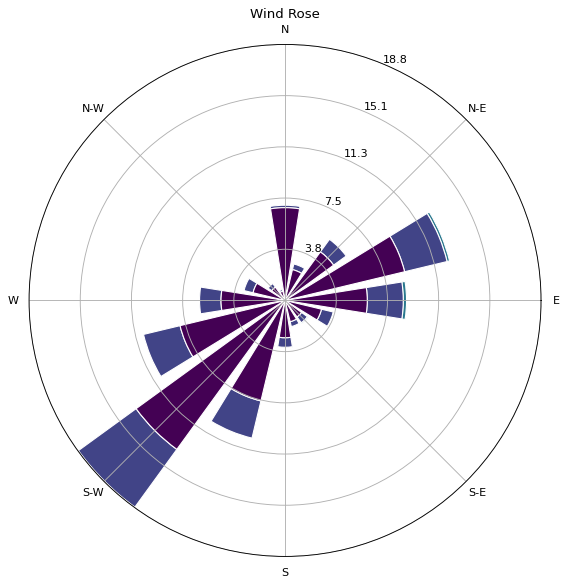

In [9]:
from windrose import WindroseAxes

# Windrose Plot
ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_title("Wind Rose")
plt.show()


Histograms

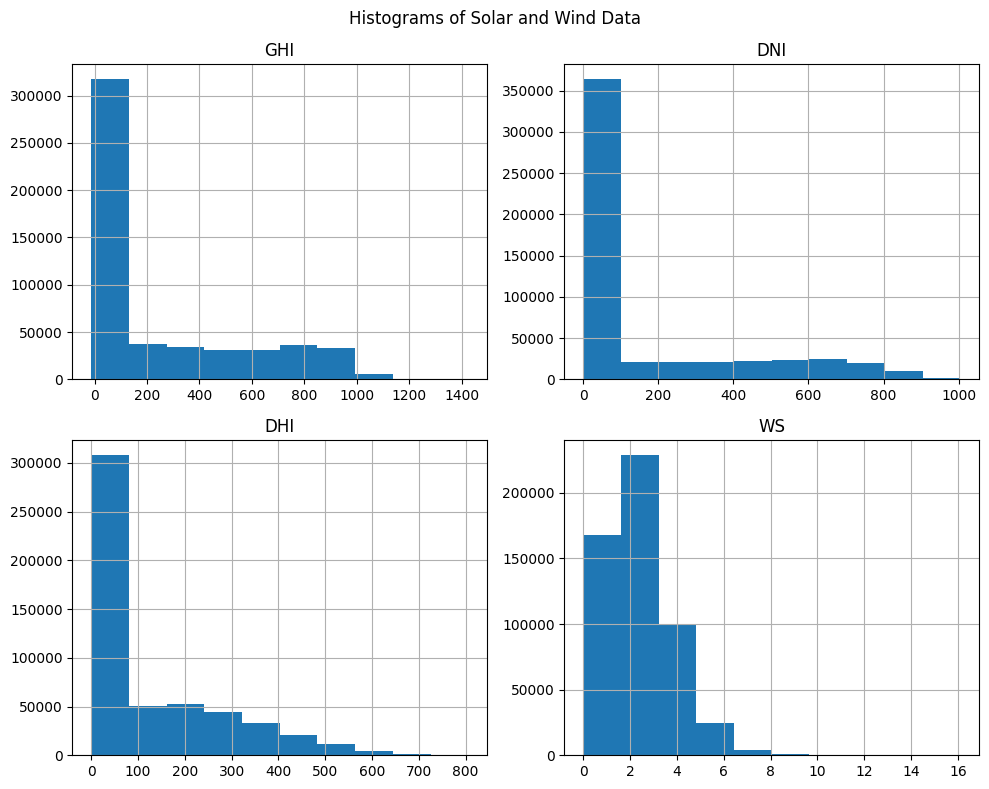

In [10]:
# Histogram for GHI, DNI, DHI, and WS
df[["GHI", "DNI", "DHI", "WS"]].hist(figsize=(10, 8), bins=10)
plt.suptitle("Histograms of Solar and Wind Data")
plt.tight_layout()
plt.show()


Z-Score Analysis

In [11]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df[["GHI", "DNI", "DHI", "Tamb"]].apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outlier Rows:\n", df[outliers])


Outlier Rows:
                  Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH  \
7860   2021-10-30 11:01:00  934.0  989.8   84.9  977.9  951.0  30.2  64.5   
39532  2021-11-21 10:53:00  893.0  905.5  138.3  976.6  939.0  34.0  19.1   
39542  2021-11-21 11:03:00  904.0  906.1  140.7  986.8  949.0  34.4  18.5   
39543  2021-11-21 11:04:00  905.0  907.7  140.9  988.9  951.0  34.4  18.9   
39544  2021-11-21 11:05:00  907.0  907.4  142.0  989.9  953.0  34.5  18.3   
...                    ...    ...    ...    ...    ...    ...   ...   ...   
510473 2022-10-14 11:54:00  709.5   63.7  629.8  703.1  694.9  30.2  66.6   
510474 2022-10-14 11:55:00  677.8   40.6  621.7  670.1  662.2  30.2  66.7   
510475 2022-10-14 11:56:00  659.5   29.7  614.9  651.0  643.4  30.3  66.1   
510476 2022-10-14 11:57:00  660.1   40.7  605.6  653.2  645.6  30.2  66.0   
510477 2022-10-14 11:58:00  655.8   50.2  591.0  647.5  639.9  30.2  66.2   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning 

 Bubble Chart

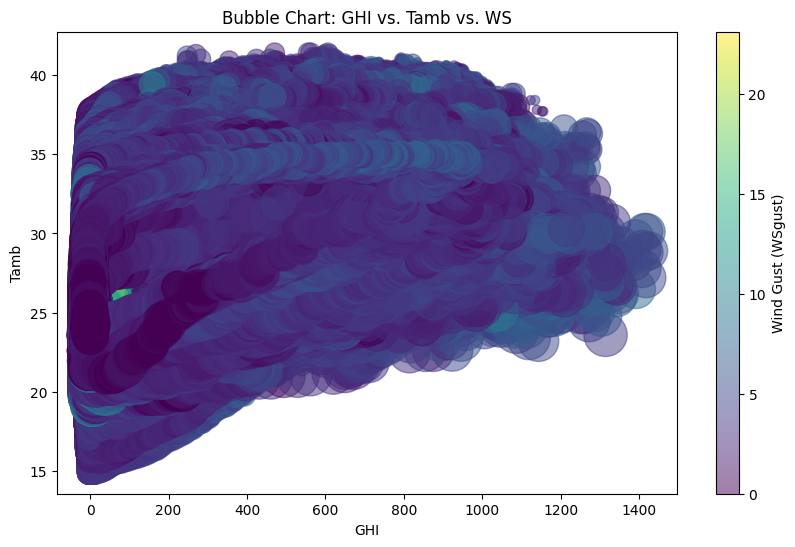

In [12]:
# Bubble chart: GHI vs. Tamb vs. WS with bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"] * 10, alpha=0.5, c=df["WSgust"], cmap="viridis")
plt.colorbar(label="Wind Gust (WSgust)")
plt.title("Bubble Chart: GHI vs. Tamb vs. WS")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
